<a href="https://colab.research.google.com/github/alex-smith-uwec/CS491/blob/main/top2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
my_path="/content/drive/MyDrive/CS491/Data/US_Inaugural_Addresses"

In [4]:
import os
import string
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text)
    # Convert to lower case
    tokens = [word.lower() for word in tokens]
    # Remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [word.translate(table) for word in tokens]
    # Remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # Filter out stop words
    words = [word for word in words if not word in stop_words]
    return words


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
documents = []

for file in os.listdir(my_path):
    if file.endswith(".txt"):
        file_path = os.path.join(my_path, file)
        with open(file_path, 'r', encoding='utf-8') as f:
            content = f.read()
            documents.append(content)  # Add the raw content to the documents list


In [8]:
!pip install Top2Vec -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 42.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.9 MB/s eta 0:00:00


In [11]:
from top2vec import Top2Vec

# Assuming 'documents' is a list of text documents you wish to model
model = Top2Vec(documents, embedding_model='doc2vec', workers=2)

# Now you can use the model to find topics, get topic sizes, etc.
topics = model.get_topics()


2024-03-16 17:18:40,902 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2024-03-16 17:18:41,507 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-03-16 17:18:45,810 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2024-03-16 17:18:56,845 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-03-16 17:18:56,855 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [13]:
topics

(array([['foreign', 'duties', 'subject', 'experience', 'public', 'which',
         'duty', 'principle', 'interest', 'important', 'within',
         'interests', 'should', 'may', 'however', 'proper', 'citizens',
         'domestic', 'influence', 'general', 'present', 'under',
         'necessary', 'support', 'administration', 'such', 'secure',
         'course', 'state', 'trust', 'most', 'constitutional',
         'countrymen', 'purposes', 'much', 'congress', 'protection',
         'ought', 'be', 'commerce', 'far', 'whose', 'whole',
         'institutions', 'might', 'am', 'executive', 'any', 'from', 'the'],
        ['lives', 'live', 'know', 'today', 'america', 'together', 'work',
         'new', 'we', 'old', 'americans', 'again', 'history', 'earth',
         'world', 'strength', 'strong', 'ourselves', 'democracy',
         'nation', 'help', 'because', 'always', 'children', 'come',
         'need', 'god', 'change', 'way', 'opportunity', 'see', 'us',
         'where', 'day', 'freedom', 'b

In [14]:
len(topics)

3

In [17]:
topics[0][0]

array(['foreign', 'duties', 'subject', 'experience', 'public', 'which',
       'duty', 'principle', 'interest', 'important', 'within',
       'interests', 'should', 'may', 'however', 'proper', 'citizens',
       'domestic', 'influence', 'general', 'present', 'under',
       'necessary', 'support', 'administration', 'such', 'secure',
       'course', 'state', 'trust', 'most', 'constitutional', 'countrymen',
       'purposes', 'much', 'congress', 'protection', 'ought', 'be',
       'commerce', 'far', 'whose', 'whole', 'institutions', 'might', 'am',
       'executive', 'any', 'from', 'the'], dtype='<U14')

In [18]:
topics[0][1]

array(['lives', 'live', 'know', 'today', 'america', 'together', 'work',
       'new', 'we', 'old', 'americans', 'again', 'history', 'earth',
       'world', 'strength', 'strong', 'ourselves', 'democracy', 'nation',
       'help', 'because', 'always', 'children', 'come', 'need', 'god',
       'change', 'way', 'opportunity', 'see', 'us', 'where', 'day',
       'freedom', 'better', 'century', 'land', 'what', 'out', 'like',
       'stand', 'let', 'find', 'now', 'are', 'each', 'responsibility',
       'human', 'faith'], dtype='<U14')

In [43]:
# Assuming 'model' is your trained Top2Vec model and 'keywords' is a list of keywords.
keywords = ["war", "liberty"]
documents, document_score, document_ids = model.search_documents_by_keywords(keywords=keywords, num_docs=10)

# This will return the top 10 most similar documents to the provided keywords,
# their similarity scores, and their IDs within the model.


In [44]:
# Print the results
for i in range(len(documents)):
    print(f"Document ID: {document_ids[i]}")
    print(f"Similarity Score: {document_score[i]}")
    print(f"Document Content: {documents[i][:20]}...")  # Print the first 200 characters to get an idea of the document content
    print("---")

Document ID: 45
Similarity Score: 0.8246692419052124
Document Content: Abraham Lincoln	1865...
---
Document ID: 40
Similarity Score: 0.7564547061920166
Document Content: George Washington	17...
---
Document ID: 32
Similarity Score: 0.7035357356071472
Document Content: Theodore Roosevelt	3...
---
Document ID: 36
Similarity Score: 0.6795393824577332
Document Content: Woodrow Wilson	3/4/1...
---
Document ID: 1
Similarity Score: 0.6787212491035461
Document Content: Franklin D. Roosevel...
---
Document ID: 2
Similarity Score: 0.6562797427177429
Document Content: George W. Bush	1/20/...
---
Document ID: 7
Similarity Score: 0.632973313331604
Document Content: Lyndon B. Johnson	1/...
---
Document ID: 28
Similarity Score: 0.6076499223709106
Document Content: James Madison	1813-0...
---
Document ID: 53
Similarity Score: 0.5912734270095825
Document Content: Barack Obama	1/20/20...
---
Document ID: 54
Similarity Score: 0.590540885925293
Document Content: Franklin D. Roosevel...
---


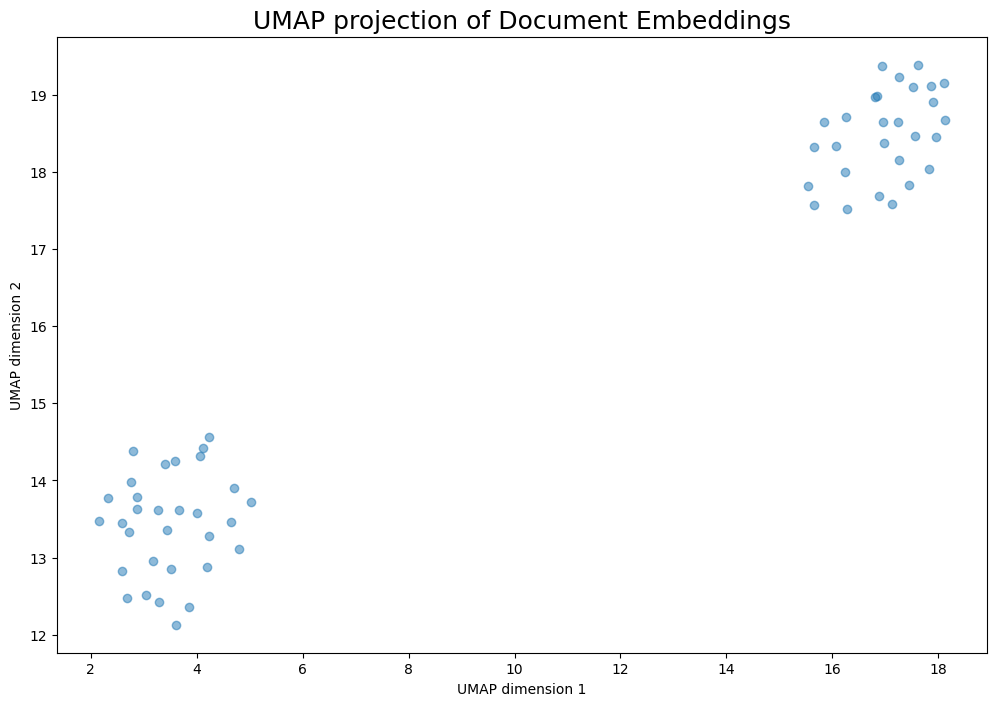

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import umap.umap_ as umap  # UMAP for dimensionality reduction

# Assuming 'model' is your trained Top2Vec model

# Retrieve document embeddings from the Top2Vec model
document_embeddings = model.document_vectors

# Reduce the dimensionality of embeddings to 2D for visualization
umap_embeddings = umap.UMAP(n_neighbors=15, n_components=2, metric='cosine').fit_transform(document_embeddings)

# Plot the UMAP embeddings
plt.figure(figsize=(12, 8))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], alpha=0.5)
plt.title('UMAP projection of Document Embeddings', fontsize=18)
plt.xlabel('UMAP dimension 1')
plt.ylabel('UMAP dimension 2')
plt.show()
